 ## Sentiment Analysis Project:  Tracking the Evolution of Donald Trump's Tweet Sentiments Over Time

In my project, I will analyze tweets from 45th US President Donal Trump from 2009 to 2020 and try to uncover how the sentiment of his tweets evolve over time, during his election campaign versus during his presidency.
The dataset I use is from Kaggle and can be retrived from this link: https://www.kaggle.com/datasets/austinreese/trump-tweets

Dataset have information on Tweets, date of tweet, number of retweets and likes.

In [2]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.dates as mdates
#pip install nbconvert[webpdf]

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('vader_lexicon')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\YIGIT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\YIGIT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\YIGIT\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [8]:
data = pd.read_csv("realdonaldtrump.csv")

Initial look into raw data:

In [4]:
data.head()

,id,link,Tweets,Date,retweets,favorites,mentions,hashtags
0,1.698309e+09,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,04/05/2009 13:54,510,917,NaN,NaN
1,1.701461e+09,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,04/05/2009 20:00,34,267,NaN,NaN
2,1.737480e+09,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,08/05/2009 08:38,13,19,NaN,NaN
3,1.741161e+09,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,08/05/2009 15:40,11,26,NaN,NaN
4,1.773561e+09,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",12/05/2009 09:07,1375,1945,NaN,NaN


### Preprocessing:

Raw text data is unstructured, which can negatively impact the performance of the NLP algorithm I apply. By doing text preprocessing it wil help clean and transform the text data into a structured format that can be more easily understood and analyzed by algorithms.

Tweets include emjois, so i remove them.

In [5]:
def remove_emojis(text):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+",
        flags=re.UNICODE,
    )
    return emoji_pattern.sub(r"", text)

Below preprocess function takes the raw text and step by step implements hashtag, mention, URL removal; punctuation, special character and number removal; special formatting and escape characters; converts to lowercase; removes redundant space; tokenizes the text (split text into individual words), apply stemming (reduce words to root form) and lemmatization (convert words to base form), and finally removes stopwords (stopwords are common words that don't carry much meaning).


In [6]:
def preprocess_text(text):
    text = re.sub(r"(?:\@|\#|https?\://)\S+", "", text)
    text = remove_emojis(text)
    text = text.translate(str.maketrans("", "", string.punctuation + string.digits))
    text = re.sub(r"\\[a-z]+", "", text)
    text = text.lower()
    text = " ".join(text.split())
    tokens = word_tokenize(text)
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    tokens = [token for token in tokens if token not in stopwords.words("english")]
    return " ".join(tokens)

Then I apply the text preporocessor function to raw text data.

In [9]:
data["processed_tweet"] = data["content"].apply(preprocess_text)

Let's use wordcloud to visualize most frequently occurring words in Trump tweets dataset.

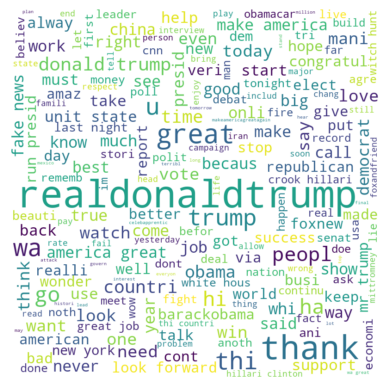

In [10]:
all_words = " ".join(text for text in data["processed_tweet"])
wordcloud = WordCloud(width=800, height=800, background_color="white").generate(all_words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

As can be seen, some of the most frequent words he included in his tweets were "thank", "great", "fake news", "make america", "china", "obama", as we can all clearly recall from his election campaigns and press releases during his presidency.

## Sentiment Analysis

The main goal of doing sentiment analysis is to classify the text from tweets into categories like positive, negative, or neutral based on the emotions or opinions conveyed in them, which can be used to assess public opinion on political issues, candidates, or events, which can then help inform campaign strategies or policy decisions. 

First, I define a sentiment intensity analyzer to analyze the sentiment of the preprocessed tweets. Then I store the compound sentiment scores in a new column called "sentiment_score".

In [11]:
analyzer = SentimentIntensityAnalyzer()
data["sentiment_score"] = data["processed_tweet"].apply(lambda x: analyzer.polarity_scores(x)["compound"])
data.head()

,id,link,content,date,retweets,favorites,mentions,hashtags,processed_tweet,sentiment_score
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 13:54:25,510,917,NaN,NaN,sure tune watch donald trump late night david ...,0.4767
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-04 20:00:10,34,267,NaN,NaN,donald trump appear view tomorrow morn discus ...,0.7506
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 08:38:08,13,19,NaN,NaN,donald trump read top ten financi tip late sho...,0.2023
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 15:40:15,11,26,NaN,NaN,new blog post celebr apprentic final lesson le...,0.0000
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 09:07:28,1375,1945,NaN,NaN,persona never wallflow ’ rather build wall cli...,0.0000


Lets see some of the tweets along with their sentiment scores:

In [12]:
tweet_sentiment_df = pd.DataFrame(
    {"Processed Tweet": data["content"], "Sentiment Score": data["sentiment_score"]})
print(tweet_sentiment_df)

                                         Processed Tweet  Sentiment Score
0      Be sure to tune in and watch Donald Trump on L...           0.4767
1      Donald Trump will be appearing on The View tom...           0.7506
2      Donald Trump reads Top Ten Financial Tips on L...           0.2023
3      New Blog Post: Celebrity Apprentice Finale and...           0.0000
4      "My persona will never be that of a wallflower...           0.0000
...                                                  ...              ...
43347  Joe Biden was a TOTAL FAILURE in Government. H...           0.0000
43348  Will be interviewed on @ seanhannity tonight a...           0.4939
43349                         pic.twitter.com/3lm1spbU8X           0.0000
43350                         pic.twitter.com/vpCE5MadUz           0.0000
43351                         pic.twitter.com/VLlc0BHW41           0.0000

[43352 rows x 2 columns]


Next step is to make sense of these scores. For that, I create a function that takes the sentiment score as input and returns a label ("positive", "neutral", or "negative") based on the score.

In [13]:
data['neutral'] = data['content'].apply(lambda x: analyzer.polarity_scores(str(x))['neu'])
data['negative'] = data['content'].apply(lambda x: analyzer.polarity_scores(str(x))['neg'])
data['positive'] = data['content'].apply(lambda x: analyzer.polarity_scores(str(x))['pos'])

In [14]:
data['sentiment']=''
data.loc[data.sentiment_score>0.05,'sentiment']='Positive'
data.loc[(data.sentiment_score>-0.05) & (data.sentiment_score<0.05),'sentiment']='Neutral'
data.loc[data.sentiment_score<-0.05,'sentiment']='Negative'

In [15]:
data.tail()

,id,link,content,date,retweets,favorites,mentions,hashtags,processed_tweet,sentiment_score,neutral,negative,positive,sentiment
43347,1273405198698975232,https://twitter.com/realDonaldTrump/status/127...,Joe Biden was a TOTAL FAILURE in Government. H...,2020-06-17 19:00:32,23402,116377,NaN,NaN,joe biden wa total failur govern “ bungl ” eve...,0.0000,0.735,0.265,0.00,Neutral
43348,1273408026968457216,https://twitter.com/realDonaldTrump/status/127...,Will be interviewed on @ seanhannity tonight a...,2020-06-17 19:11:47,11810,56659,@seanhannity,NaN,interview seanhann tonight pm enjoy,0.4939,0.720,0.000,0.28,Positive
43349,1273442195161387008,https://twitter.com/realDonaldTrump/status/127...,pic.twitter.com/3lm1spbU8X,2020-06-17 21:27:33,4959,19344,NaN,NaN,pictwittercomlmspbux,0.0000,1.000,0.000,0.00,Neutral
43350,1273442469066276864,https://twitter.com/realDonaldTrump/status/127...,pic.twitter.com/vpCE5MadUz,2020-06-17 21:28:38,4627,17022,NaN,NaN,pictwittercomvpcemaduz,0.0000,1.000,0.000,0.00,Neutral
43351,1273442528411385858,https://twitter.com/realDonaldTrump/status/127...,pic.twitter.com/VLlc0BHW41,2020-06-17 21:28:52,3951,14344,NaN,NaN,pictwittercomvllcbhw,0.0000,1.000,0.000,0.00,Neutral


Lets compare wordclouds of tweets with different sentiments.

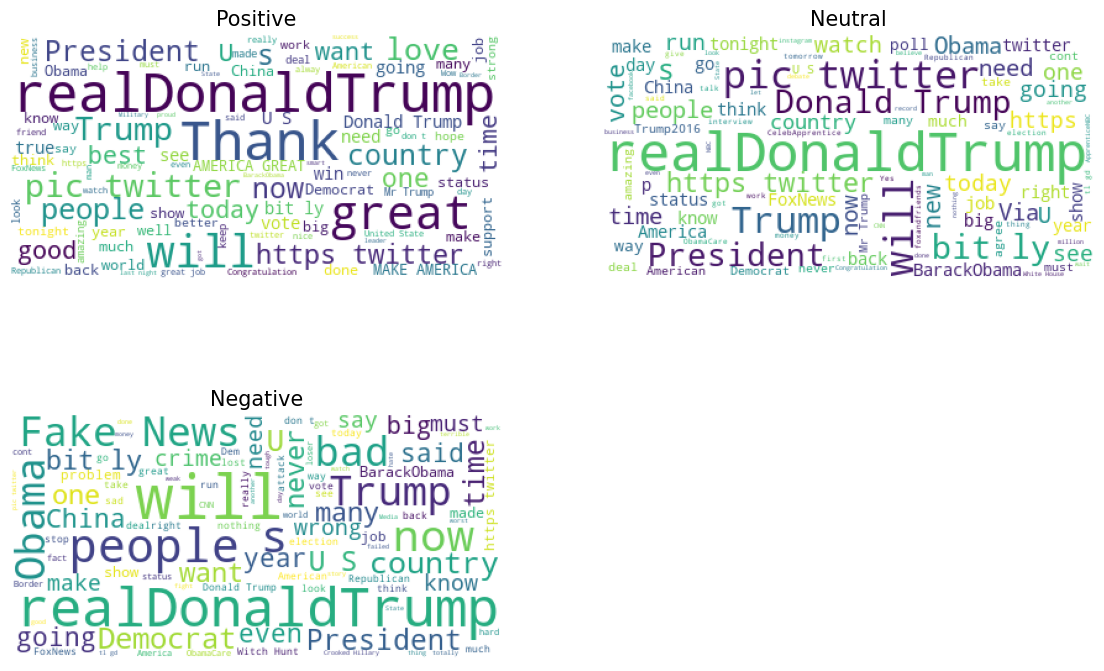

In [16]:
from wordcloud import WordCloud, STOPWORDS
def show_wordcloud(data):
    sentiments=data.sentiment.value_counts().index.to_list()
    stopwords = set(STOPWORDS)
    plt.subplots(figsize=(14,14))
    i=1
    for senti in sentiments:
        curr=data['content'].loc[data.sentiment==senti]
        text=curr.values
        text=' '.join(text)   
        wordcloud=WordCloud(max_words=100, stopwords=stopwords, background_color='white', max_font_size=50).generate(text)
  
        plt.subplot(3,2,i)
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.title(senti,fontsize=15)
        i+=1
        
show_wordcloud(data)

As can be seen, negative wordcloud includes words like "bad", "fake", "wrong" while positive and neutral include words like "win", "best", "show" , "great" etc.

## Sentiment distribution of tweets: Election Campaing vs Presidency

Below figures show the sentiment distribution of tweets during Trump's election campaign vs during his presidency.

(Campaign start: June 16, 2015. Election day: November 8, 2016. Presidency start: January 20, 2017)

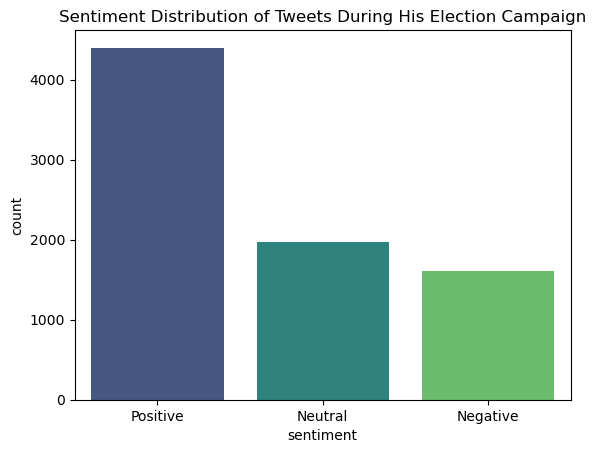

In [17]:
data['date'] = pd.to_datetime(data['date'], infer_datetime_format=True)
start_date = pd.to_datetime('2015-06-16')
end_date = pd.to_datetime('2017-01-20')
filtered_data = data[(data['date'] >= start_date) & (data['date'] <= end_date)]

sns.countplot(x='sentiment', data=filtered_data, palette='viridis')
plt.title('Sentiment Distribution of Tweets During His Election Campaign')
plt.show()


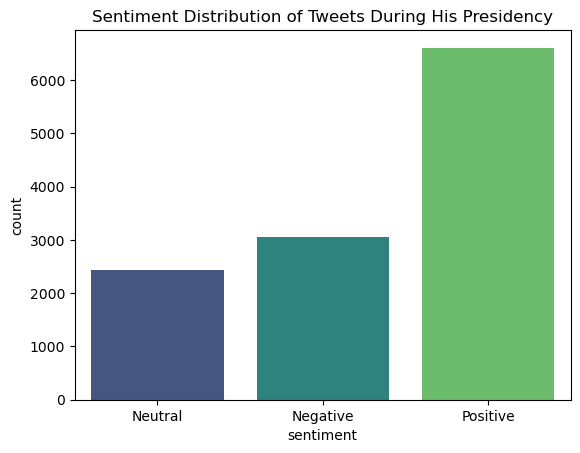

In [18]:
data['date'] = pd.to_datetime(data['date'], infer_datetime_format=True)
start_date = pd.to_datetime('2017-01-20')
end_date = data['date'].max()
filtered_data = data[(data['date'] >= start_date) & (data['date'] <= end_date)]

sns.countplot(x='sentiment', data=filtered_data, palette='viridis')
plt.title('Sentiment Distribution of Tweets During His Presidency')
plt.show()

During his presidency, he tweeted more woth negative sentiment than he tweeted neutral.

## Tweet Sentiments Over Time

In this final part, I will plot tweet sentiments of Donald Trump over time.

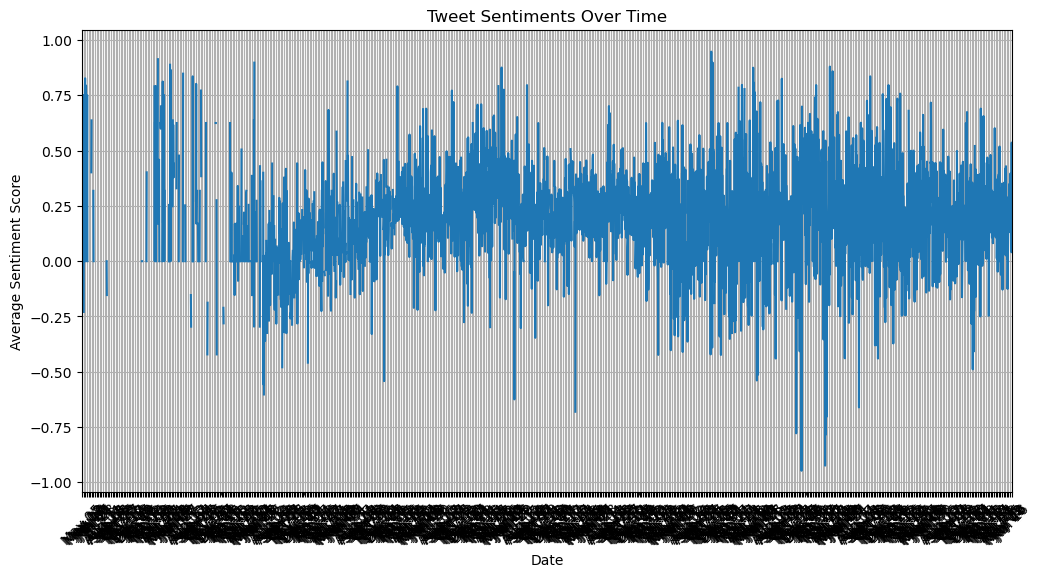

In [19]:
data.set_index("date", inplace=True)
daily_sentiment = data["sentiment_score"].resample("D").mean()

fig, ax = plt.subplots(figsize=(12, 6))
daily_sentiment.plot(ax=ax)
ax.set(xlabel="Date", ylabel="Average Sentiment Score", title="Tweet Sentiments Over Time")
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %d"))
plt.xticks(rotation=45)
plt.grid()
plt.show()


He starts tweeting more frequently through time. And the average daily sentiment scores of his tweets, namely the sentiment of them, are more volatile. Notice that around the last parts of the time period, which roughly coincides with his election campaign period start of June 16, 2015 to the election day November 8, 2016. 

## Conclusion

In conclusion, it is also important to acknowledge the limitations of sentiment analysis in this project. Detecting sarcasm and irony poses a significant challenge, as algorithms often struggle to interpret the intended sentiment beyond the literal meaning of words. Ambiguity in language can also lead to inaccuracies, as words can have multiple meanings depending on the context. Moreover, short and informal text, such as tweets in this case, presents difficulties in accurately assessing sentiment due to their unconventional language use. Lastly, negations and complex expressions combining both positive and negative sentiment can be difficult for algorithms to decipher, potentially leading to misinterpretations. Despite these challenges, sentiment analysis help us interpret public opinion and emotions and how they evolve over time in certain examples.

In [20]:
from nbconvert.exporters import WebPDFExporter
exporter = WebPDFExporter(allow_chromium_download=True)
output, resources = exporter.from_filename('NLP Project_Tahmisoglu_Yigit.ipynb')
with open('NLP Project_Tahmisoglu_Yigit.pdf', 'wb') as f:
    f.write(output)